In [2]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [4]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [5]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [6]:
# ウェブ上のリソースを指定する
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sake_dataJ.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'parkinsons.data') # Python 3 の場合

('parkinsons.data', <http.client.HTTPMessage at 0x1096c2e10>)

In [7]:
# データの読み込み
df = pd.read_csv('parkinsons.data', sep=',', index_col=0)

In [8]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571


In [9]:
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)#正規化

In [10]:
dfs

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,-0.827171,-0.435045,-0.949593,0.334054,0.747835,0.132621,0.758847,0.131417,0.744070,0.737637,...,0.605972,-0.067719,-0.192729,0.569961,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655
phon_R01_S01_2,-0.768992,-0.529611,-0.057572,0.713581,1.035010,0.452726,1.273531,0.451521,1.677413,1.763924,...,1.544279,-0.137489,-0.632879,0.569961,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974
phon_R01_S01_3,-0.907141,-0.721312,-0.109593,0.882719,1.322186,0.718919,1.581616,0.719960,1.199605,1.024997,...,1.172305,-0.290884,-0.279042,0.569961,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060
phon_R01_S01_4,-0.907286,-0.647425,-0.113935,0.773398,1.322186,0.577399,1.280780,0.576194,1.336955,1.204598,...,1.336788,-0.279998,-0.280624,0.569961,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314
phon_R01_S01_5,-0.923281,-0.604689,-0.130272,1.365379,1.896537,1.092937,2.041931,1.093977,1.831733,1.548404,...,1.894585,-0.177569,-0.505444,0.569961,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262
phon_R01_S01_6,-0.813641,-0.720754,-0.058308,0.713581,1.035010,0.445987,1.469255,0.444782,0.917481,0.891580,...,0.750428,-0.312409,-0.114777,0.569961,-0.798251,1.933105,1.322252,0.870451,-0.507488,1.678035
phon_R01_S02_1,-0.820526,-0.654278,-0.034572,-0.596201,-0.400868,-0.591827,-0.516988,-0.590783,-0.722765,-0.729953,...,-0.775551,-0.464567,0.677855,0.569961,0.938069,0.831522,0.045931,0.373735,-1.376809,0.057750
phon_R01_S02_2,-1.133041,-0.910083,-0.275948,-0.684895,-0.400868,-0.628892,-0.589479,-0.630095,-0.744508,-0.760742,...,-0.726305,-0.529636,1.131110,0.569961,1.336176,0.816161,-0.443224,-0.513026,-0.828458,-0.474889
phon_R01_S02_3,-1.413350,-0.710852,-0.564564,-0.146543,0.460659,-0.126833,-0.045799,-0.125790,-0.465565,-0.468250,...,-0.486311,-0.350015,-0.016714,0.569961,1.125780,1.002749,0.170352,1.214049,-0.154951,0.277625


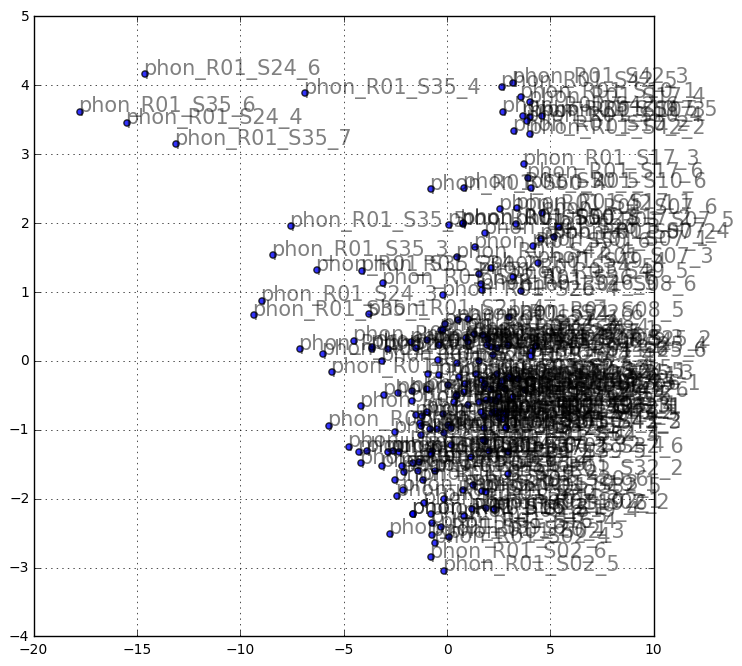

In [11]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

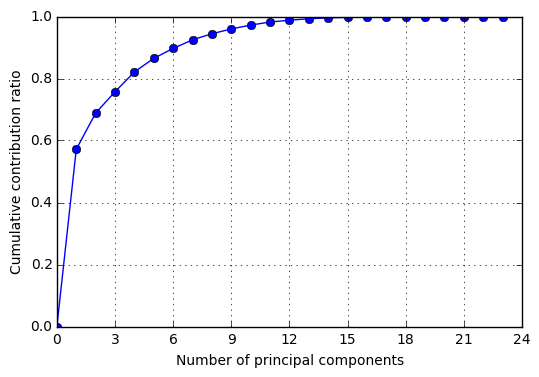

In [12]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

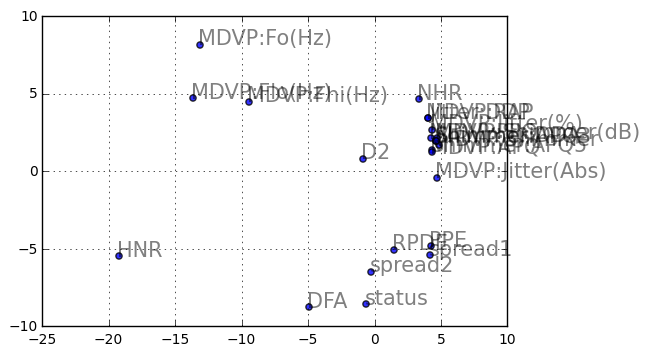

In [13]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :].T)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :].T)
# 第一主成分と第二主成分でプロットする
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

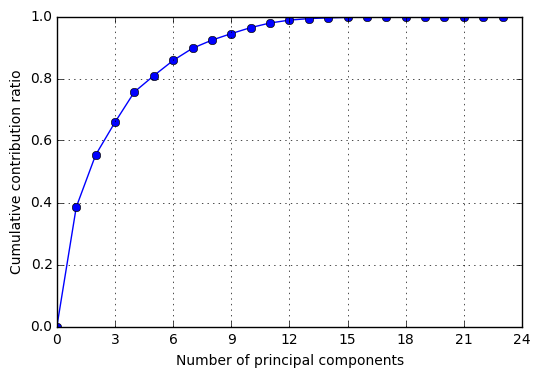

In [14]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

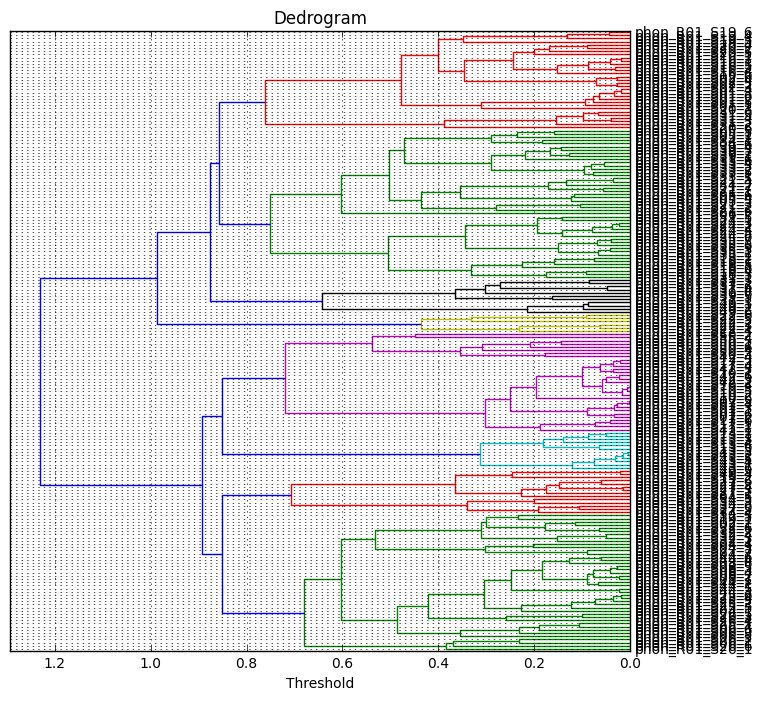

In [15]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
#y_labels.append("1")
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
#dendrogram(result1, labels = list(df.iloc[:, 0:1]))
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df.index), color_threshold=0.8)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

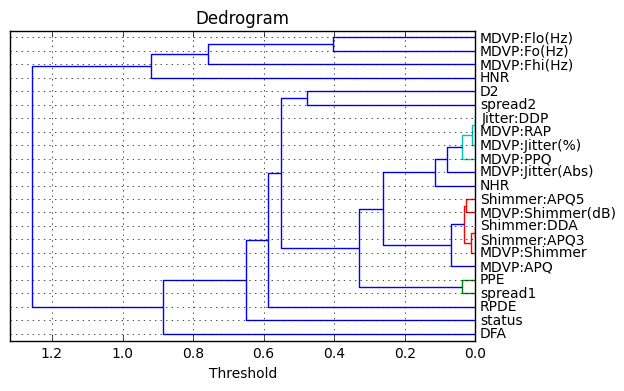

In [16]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
#y_labels.append("1")
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.T.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
#dendrogram(result1, labels = list(df.iloc[:, 0:1]))
#plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df.columns), color_threshold=0.05)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()